# Descripcion del problema o situacion a resolver

Para analizar una cancion se tienen en cuenta varios factores, entre ellos, que tan bailable es, que tan ruidosa, que emocion transmite si es feliz o triste, etc.

Para maximizar la rentabilidad de una productora musical se decidio analizar, las caracteriscticas de los temas mas escuchados en Spotify, con la finalidad de determinar que caracteristicas musicales, hacen que tenga mas reproducciones.

Con el objetivo de poner a disposicion del productor musical, dichas caracteristicas para futuras producciones.

# EDA

En base a un dataset de Spotify de 41106 registros sin valores nulos, de canciones entre la decada 1960 y 2010, para el cual 20553 canciones son Hit y 20553 canciones son No Hit.

### Analizamos lo siguiente
### Correlacion Positiva

- **Danceability**: Característica que permite conocer que contenido es el más adecuado para el baile. Las pistas con valores cercanos a 1, son los que mayormente reflejan esta característica en todo su desarrollo. algunos elementos que permiten caracterizarla son el tempo, la estabilidad del ritmo, la regularidad que presente la pista, entre otros.

- **Loudness**: el volumen general de una pista en decibelios (dB). Los valores de sonoridad se promedian en toda la pista y son útiles para comparar la sonoridad relativa de las pistas. La sonoridad es la calidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Los valores típicos oscilan entre -60 y 0 db.

- **Energy**: Es una medida que expresa la frecuencia, el volumen y el tono del tema musical

- **Valence**: Esta propiedad musical describe la positividad musical transmitida por una pista de audio. Las pistas con alta valencia están asociadas con emociones positivas tales como: estar feliz, alegre eufórico, entre otros. Por otra parte, las pistas de con baja valencia están asociadas a emociones negativas o estados de ánimo tales como: tristeza, depresión, enojo

### Correlacion Negativa

- **Instrumentalness**: El instrumental es usado cuando se refiere a la música popular; algunos géneros musicales hacen poco uso de la voz, tales como el 'post rock', el 'jazz', la música electrónica, y gran cantidad de la clásica. En la música comercial, algunos álbumes incluyen temas instrumentales.

- **Acousticness**: Es la característica que permite medir la probabilidad de que una grabación se haya creado únicamente con elementos tales como la voz e instrumentos acústicos, en lugar de utilizar elementos electrónicos. Las pistas con valores bajos suelen incluir guitarras eléctricas, distorsión, sintetizadores, entre otros. Así mismo, los valores cercanos a 1 indican que la canción presenta esta característica

# BASELINE

Al ver el heatmap determinamos que variables tenian mayor correlacion o influencia para determinar si una cancion era Hit o No Hit

Luego viendo las Medianas podemos determinar un valor aproximado esperado de cada una de las features:

 - **danceability**: Viendo las medianas de las canciones Hit vemos que esta Feature debe tener un valor alto la mediana es mayor a 60%.
 
 - **loudness**: Viendo las medianas de las canciones Hit vemos que esta Feature debe tener un valor bajo, el valor de esta feature fue cambiando con el pasar de los años pero     siempre las canciones Hit tenian un valor de loudness mas cercano al 0.
 
 - **energy**: Viendo las medianas de las canciones Hit vemos que esta Feature debe tener un valor alto la mediana es mayor a 60%.
 
 - **valence**: Viendo las medianas de las canciones Hit vemos que esta Feature debe tener un valor alto la mediana es mayor a 60%.
 
 - **instrumentalness**: Viendo las medianas de las canciones Hit vemos que esta Feature debe tener un valor muy bajo la mediana de las canciones Hit debe tender a 0
 
 - **acousticness**: Viendo las medianas de las canciones Hit vemos que esta Feature debe tener un valor bajo la mediana de las canciones Hit es menor al 20%
 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image

### Carga de datos

In [2]:
sesentas = pd.read_csv("dataset-of-60s.csv", index_col=False )
setentas = pd.read_csv("dataset-of-70s.csv" , index_col=False)
ochentas = pd.read_csv("dataset-of-80s.csv" , index_col=False)
noventas = pd.read_csv("dataset-of-90s.csv", index_col=False)
dosmil = pd.read_csv("dataset-of-00s.csv", index_col=False)
dosmildiez = pd.read_csv("dataset-of-10s.csv", index_col=False)

In [3]:
sesentas["decada"] = 1960
setentas["decada"] = 1970
ochentas["decada"] = 1980
noventas["decada"] = 1990
dosmil["decada"] = 2000
dosmildiez["decada"] = 2010
# agregamos una columna a cada dataset que indica la decada a la que pertenece

In [4]:
decadas = [sesentas, setentas, ochentas, noventas, dosmil, dosmildiez]
for i in range(len(decadas)):
    x = decadas[i]
    result = []
    for u in range(decadas[i]['decada'].count()):
        result.append(round(x['duration_ms'][u]/60000 , 2))
    x['duration_min'] = result


In [5]:
df = pd.concat([sesentas, setentas, ochentas, noventas, dosmil, dosmildiez])
# Concatenamos los archivos de decadas

# Analisis Exploratorio

### Defición de variables para análisis de datos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41106 entries, 0 to 6397
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float64

In [7]:
df.head(5)

track            artist  \
0  Jealous Kind Of Fella     Garland Green   
1          Initials B.B.  Serge Gainsbourg   
2           Melody Twist       Lord Melody   
3          Mi Bomba Sonó        Celia Cruz   
4            Uravu Solla       P. Susheela   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:1dtKN6wwlolkM8XZy2y9C1         0.417   0.620    3    -7.727   
1  spotify:track:5hjsmSnUefdUqzsDogisiX         0.498   0.505    3   -12.475   
2  spotify:track:6uk8tI6pwxxdVTNlNOJeJh         0.657   0.649    5   -13.392   
3  spotify:track:7aNjMJ05FvUXACPWZ7yJmv         0.590   0.545    7   -12.058   
4  spotify:track:1rQ0clvgkzWr001POOPJWx         0.515   0.765   11    -3.515   

   mode  speechiness  acousticness  ...  liveness  valence    tempo  \
0     1       0.0403         0.490  ...    0.0779    0.845  185.655   
1     1       0.0337         0.018  ...    0.1760    0.797  101.801   
2     1       0.0380         0.846  ...    0.1190    0.908  115.940   
3     0       0.1040         0.706  ...    0.0610    0.967  105.592   
4     0       0.1240         0.857  ...    0.2130    0.906  114.617   

   duration_ms  time_signature  chorus_hit  sections  target  decada  \
0       173533               3    32.94975         9       1    1960   
1       213613               4    48.82510        10       0    1960   
2       223960               4    37.22663        12       0    1960   
3       157907               4    24.75484         8       0    1960   
4       245600               4    21.79874        14       0    1960   

   duration_min  
0          2.89  
1          3.56  
2          3.73  
3          2.63  
4          4.09  

[5 rows x 21 columns]

In [8]:
df.shape

#cantidad de filas y columnas

(41106, 21)

In [9]:
df.info()
df.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

#Descripcion de contenidos de las columnas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41106 entries, 0 to 6397
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float64

danceability        energy           key      loudness          mode  \
count  41106.000000  41106.000000  41106.000000  41106.000000  41106.000000   
mean       0.539695      0.579545      5.213594    -10.221525      0.693354   
std        0.177821      0.252628      3.534977      5.311626      0.461107   
min        0.000000      0.000251      0.000000    -49.253000      0.000000   
1%         0.129050      0.025605      0.000000    -28.417800      0.000000   
10%        0.291000      0.216000      0.000000    -16.841500      0.000000   
20%        0.384000      0.344000      1.000000    -13.774000      0.000000   
30%        0.451000      0.442000      2.000000    -11.998500      0.000000   
40%        0.505000      0.523000      4.000000    -10.573000      1.000000   
50%        0.552000      0.601000      5.000000     -9.257000      1.000000   
60%        0.598000      0.676000      7.000000     -8.059000      1.000000   
70%        0.645000      0.747000      8.000000     -6.930000      1.000000   
80%        0.696000      0.826000      9.000000     -5.814000      1.000000   
90%        0.762000      0.907000     10.000000     -4.613000      1.000000   
99%        0.898000      0.988000     11.000000     -2.610050      1.000000   
max        0.988000      1.000000     11.000000      3.744000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  41106.000000  41106.000000      41106.000000  41106.000000   
mean       0.072960      0.364197          0.154416      0.201535   
std        0.086112      0.338913          0.303530      0.172959   
min        0.000000      0.000000          0.000000      0.013000   
1%         0.025200      0.000009          0.000000      0.035705   
10%        0.029300      0.002650          0.000000      0.068100   
20%        0.032200      0.020900          0.000000      0.086300   
30%        0.035200      0.064400          0.000001      0.101000   
40%        0.038800      0.141000          0.000013      0.113000   
50%        0.043400      0.258000          0.000120      0.132000   
60%        0.049900      0.416000          0.001240      0.164000   
70%        0.061300      0.593000          0.014400      0.221000   
80%        0.083100      0.752000          0.242000      0.303000   
90%        0.147000      0.897000          0.808000      0.395000   
99%        0.428000      0.991000          0.953950      0.907950   
max        0.960000      0.996000          1.000000      0.999000   

            valence         tempo   duration_ms  time_signature    chorus_hit  \
count  41106.000000  41106.000000  4.110600e+04    41106.000000  41106.000000   
mean       0.542440    119.338249  2.348776e+05        3.893689     40.106041   
std        0.267329     29.098845  1.189674e+05        0.423073     19.005515   
min        0.000000      0.000000  1.516800e+04        0.000000      0.000000   
1%         0.035900     65.940800  6.830830e+04        3.000000     15.327581   
10%        0.158000     83.025500  1.401000e+05        3.000000     22.170605   
20%        0.277000     93.799000  1.628800e+05        4.000000     25.892210   
30%        0.376000    101.099000  1.825800e+05        4.000000     29.176350   
40%        0.472000    109.779000  2.013330e+05        4.000000     32.348540   
50%        0.558000    117.565000  2.179070e+05        4.000000     35.850795   
60%        0.644000    124.513000  2.349200e+05        4.000000     39.804510   
70%        0.727000    131.863000  2.545600e+05        4.000000     44.672095   
80%        0.810000    141.831000  2.822270e+05        4.000000     51.213070   
90%        0.900000    160.907500  3.344825e+05        4.000000     62.974340   
99%        0.968000    196.080200  6.343866e+05        5.000000    106.252850   
max        0.996000    241.423000  4.170227e+06        5.000000    433.182000   

           sections        target        decada  duration_min  
count  41106.000000  41106.000000  41106.000000

In [10]:
df.isna().sum()

#Busqueda de valores nulos

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
decada              0
duration_min        0
dtype: int64

In [11]:
df.target.value_counts()

#El 50% de los datos son "hits" y el otro 50 no

0    20553
1    20553
Name: target, dtype: int64

In [12]:
df.duplicated().value_counts()

#No hay valores duplicados

False    41106
dtype: int64

In [13]:
df.groupby('decada').target.value_counts()
#Observamos la cantidad de registros por decada y por target

decada  target
1960    0         4321
        1         4321
1970    0         3883
        1         3883
1980    0         3454
        1         3454
1990    0         2760
        1         2760
2000    0         2936
        1         2936
2010    0         3199
        1         3199
Name: target, dtype: int64

Text(0.5, 1.0, 'Distribucion de canciones por duración')

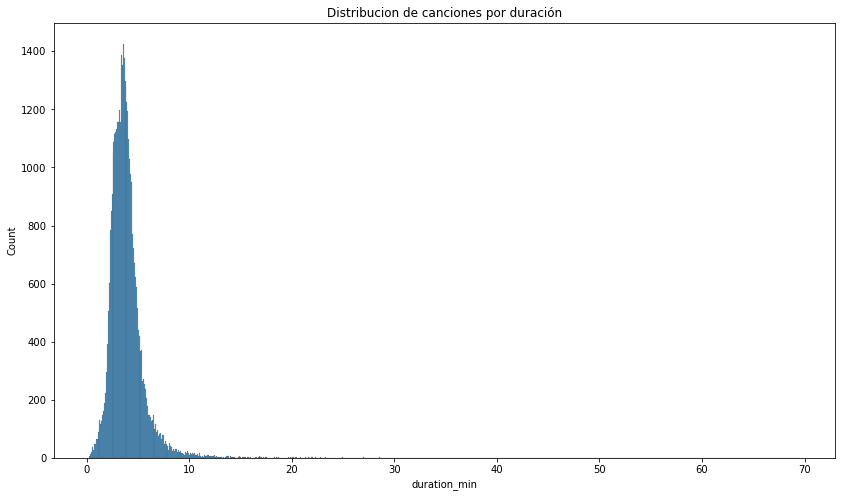

In [14]:
plt.figure(figsize = (14,8))
sns.histplot(df['duration_min'])
plt.title('Distribucion de canciones por duración')

#Se ven canciones de mas de 20 minutos, llegando hasta los 60. Se consideran outliers

In [15]:
q = df["duration_min"].quantile(0.99)
df = df[df["duration_min"] < q]

#Remuevo los outliers mencionados

Text(0.5, 1.0, 'Distribucion de canciones por duracion')

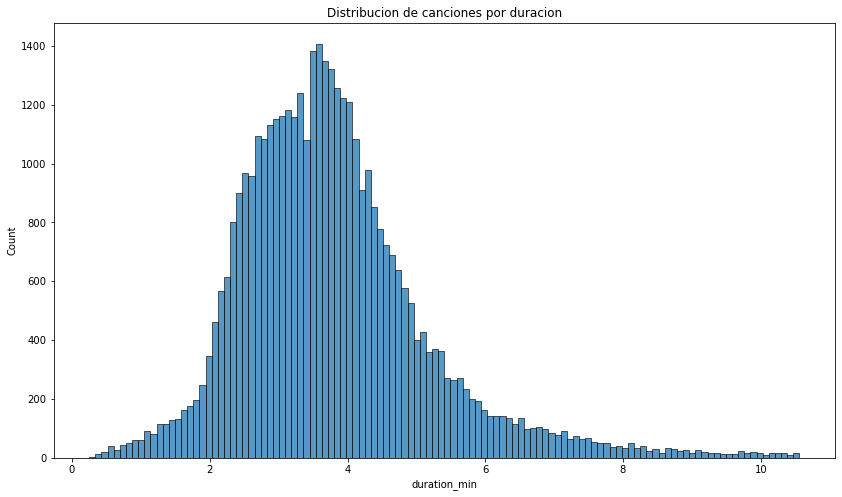

In [16]:
plt.figure(figsize = (14,8))
sns.histplot(df['duration_min'])
plt.title('Distribucion de canciones por duracion')

#Grafico de barras de cantidad de canciones por duracion en minutos

Text(0.5, 1.0, 'Distribucion de canciones por decada')

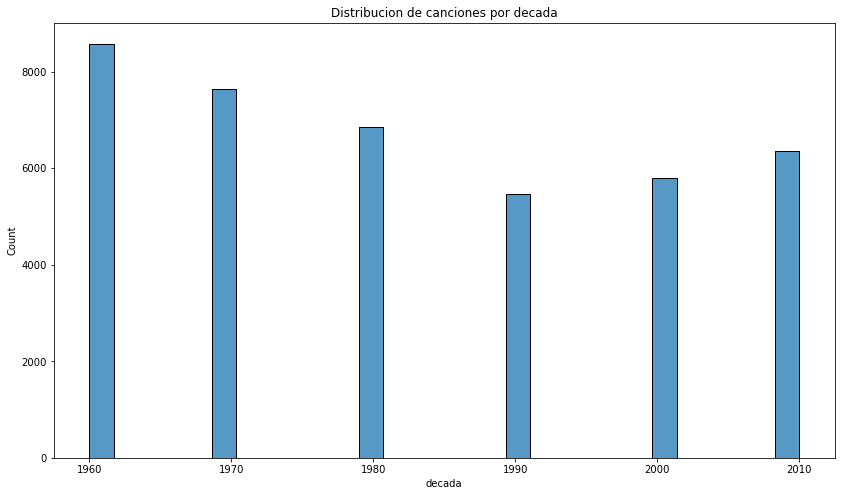

In [17]:
plt.figure(figsize = (14,8))
sns.histplot(df['decada'])
plt.title('Distribucion de canciones por decada')

#Grafico de barras de la distribucion de canciones por decada

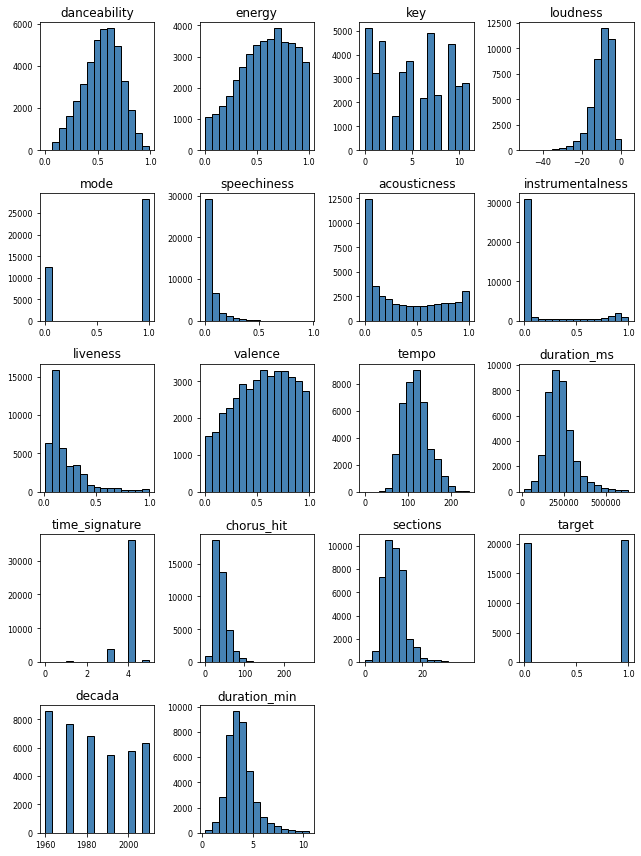

In [18]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.5, 3))   

#Observo la distribucion de todas las variables contables

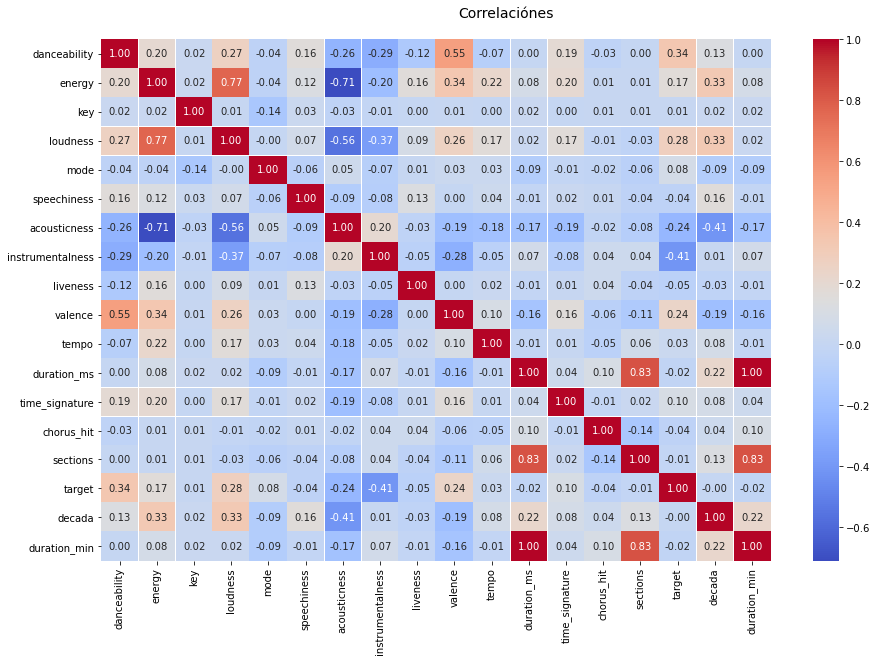

In [19]:
f, ax = plt.subplots(figsize=(15, 9))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.001)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlaciónes', fontsize=14)

#Heatmap podemos detectar correlación de las distintas variables con la target

In [20]:
df.groupby('target')[["danceability", "loudness", "energy", "valence" , "acousticness", 
                      "instrumentalness",'duration_min']].median()

#Vemos las medianas de las variables que encontramos que tiene correlación con  variable target
#target=1 "Hit" y target=0 "no hit"

danceability  loudness  energy  valence  acousticness  \
target                                                          
0              0.486  -10.6120   0.537    0.475         0.430   
1              0.610   -8.2705   0.642    0.633         0.181   

        instrumentalness  duration_min  
target                                  
0               0.009220          3.53  
1               0.000006          3.67

In [21]:
df_aux = df.loc[df['target'] == 1]
df_aux.groupby('decada')[["danceability", "loudness", "energy", "valence" , "acousticness", 
                          "instrumentalness"]].median()
# Obtenemos las medianas de las variale relevantes para cada decada cuando son Hits

danceability  loudness  energy  valence  acousticness  \
decada                                                          
1960           0.537  -10.1060   0.502   0.6990        0.5900   
1970           0.582  -10.2760   0.589   0.7080        0.2880   
1980           0.633   -9.7780   0.673   0.7020        0.1270   
1990           0.657   -8.2200   0.670   0.6040        0.0834   
2000           0.632   -5.4190   0.736   0.5650        0.0710   
2010           0.645   -5.5665   0.704   0.4875        0.0736   

        instrumentalness  
decada                    
1960            0.000003  
1970            0.000081  
1980            0.000061  
1990            0.000012  
2000            0.000000  
2010            0.000000

In [22]:
df_aux = df.loc[df['target'] == 0]
df_aux.groupby('decada')[["danceability", "loudness", "energy", "valence" , "acousticness", 
                          "instrumentalness"]].median()

#Obtenemos las medianas de las variale relevantes para cada decada cuando no son Hits

danceability  loudness  energy  valence  acousticness  \
decada                                                          
1960           0.461  -12.6220   0.357   0.4880        0.7800   
1970           0.488  -12.1860   0.462   0.5550        0.5790   
1980           0.515  -11.5660   0.577   0.5320        0.2960   
1990           0.503  -10.5000   0.563   0.4960        0.3210   
2000           0.461   -7.1020   0.769   0.3900        0.0319   
2010           0.503   -7.1555   0.732   0.3625        0.0522   

        instrumentalness  
decada                    
1960             0.00231  
1970             0.01000  
1980             0.00520  
1990             0.01270  
2000             0.02590  
2010             0.03615

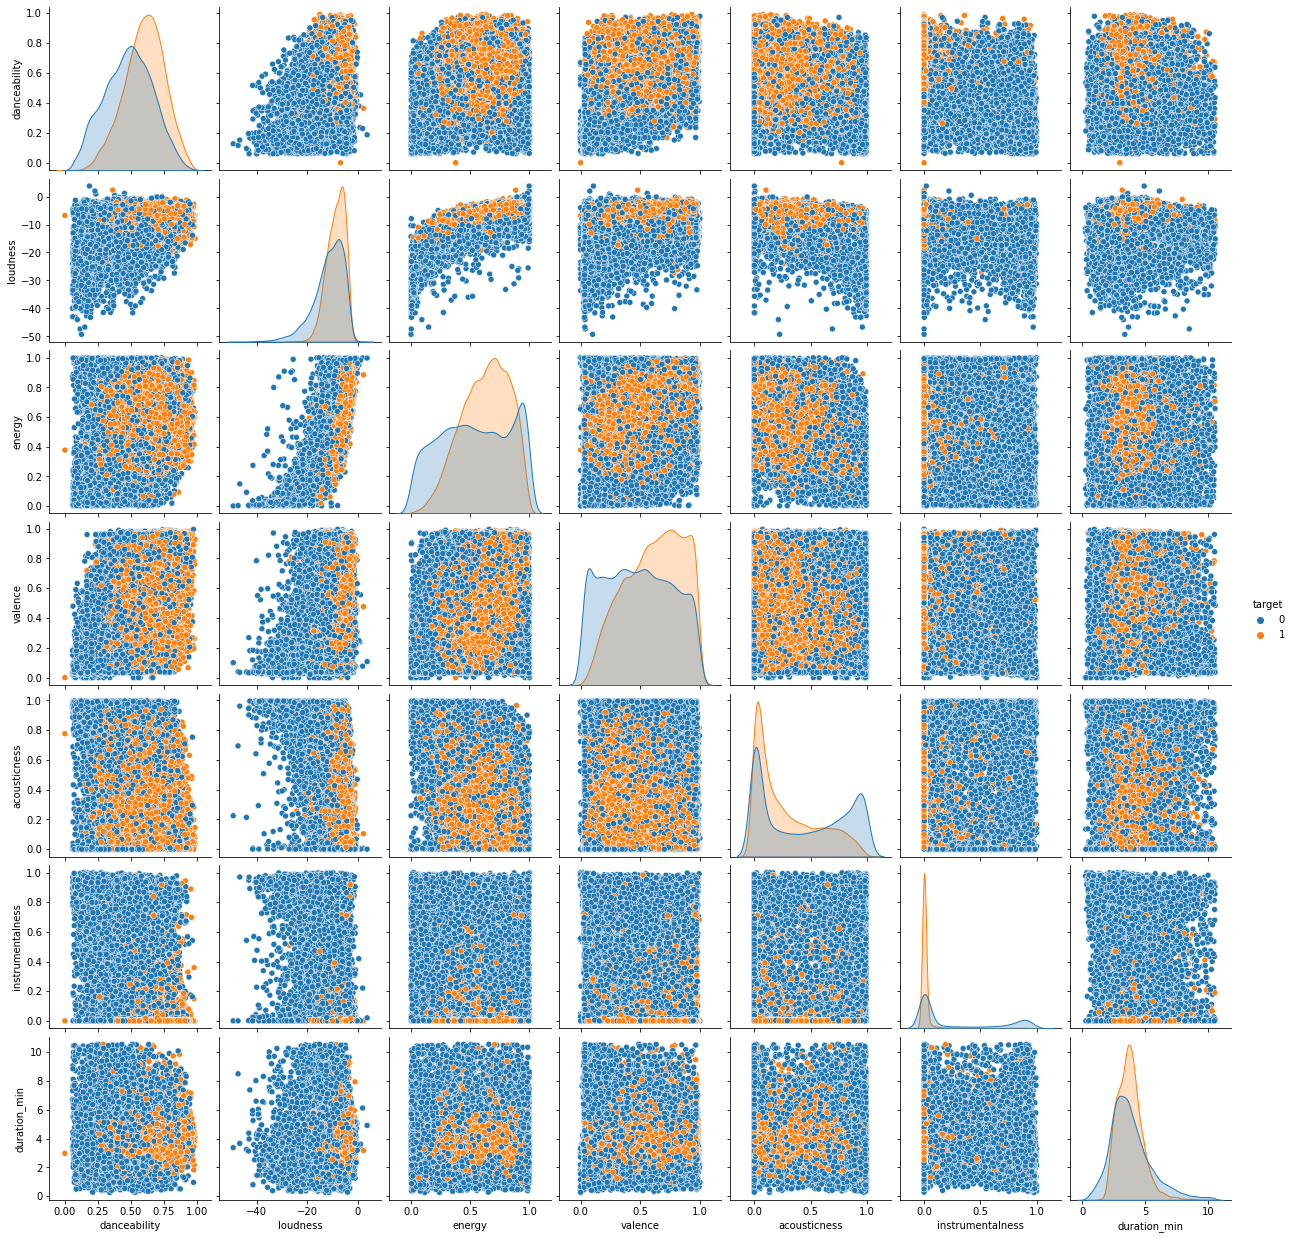

In [23]:
sns.pairplot(df[["danceability", "loudness", "energy", "valence" , "acousticness", 
                 "instrumentalness",'duration_min', 'target']], hue="target")
    
#Lo mismo que heatmap, pero esta vez mostrando exclusivamente 
#variables que demostraron correlatividad, y separando por HIT y NO_HIT


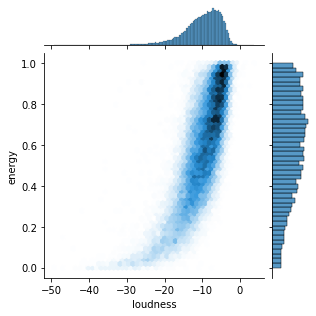

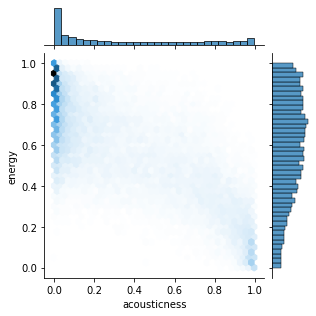

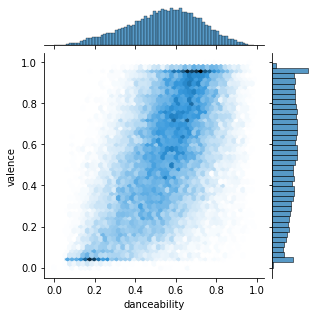

In [24]:
sns.jointplot(x="loudness", y="energy", data=df, kind="hex", height=4.5)
sns.jointplot(x="acousticness", y="energy", data=df, kind="hex", height=4.5)
sns.jointplot(x="danceability", y="valence", data=df, kind="hex", height=4.5)

#Demostracion de la fuerte correlatividad de ciertas variables

In [25]:
artist_df = pd.pivot_table(df, values='target', index=['artist'], aggfunc=np.sum)

artist_df.fillna(0, inplace=True)
artist_df=artist_df.sort_values(by=['target'], ascending=False)
artist_df.head(30)

#TOP 30 Artistas que mas HITS sacaron

target
artist                    
The Beatles             59
Elton John              55
The Rolling Stones      54
Madonna                 53
Stevie Wonder           53
Taylor Swift            52
Glee Cast               52
Drake                   51
Neil Diamond            50
Aretha Franklin         50
The Beach Boys          49
Dionne Warwick          46
The Temptations         45
Tim McGraw              45
Kenny Chesney           43
Chicago                 42
Rod Stewart             42
Bee Gees                41
Billy Joel              40
Michael Jackson         40
Four Tops               39
Connie Francis          36
Keith Urban             35
Toby Keith              35
Brad Paisley            34
George Strait           34
Marvin Gaye             34
Rascal Flatts           33
Bobby Vinton            33
Diana Ross              32

Text(0, 0.5, 'danceability')

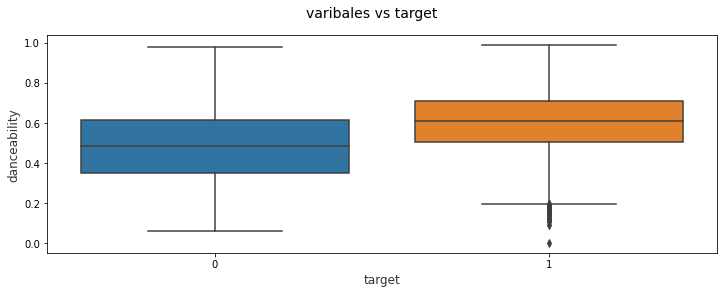

In [26]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('varibales vs target', fontsize=14)

sns.boxplot(x="target", y="danceability", data=df,  ax=ax)
ax.set_xlabel("target",size = 12,alpha=0.8)
ax.set_ylabel("danceability",size = 12,alpha=0.8)

#Vemos la distribución de la variables seleccionadas como relevantes: danceability

Text(0, 0.5, 'energy')

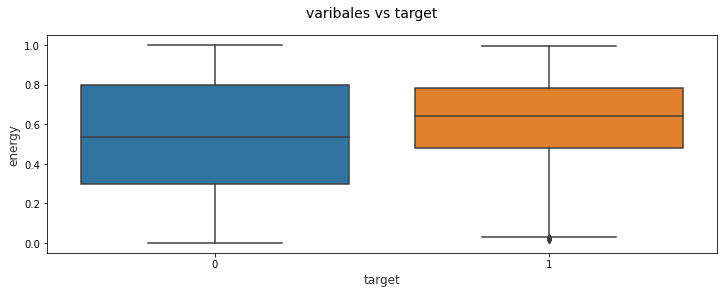

In [27]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('varibales vs target', fontsize=14)

sns.boxplot(x="target", y="energy", data=df,  ax=ax)
ax.set_xlabel("target",size = 12,alpha=0.8)
ax.set_ylabel("energy",size = 12,alpha=0.8)

#Vemos la distribución de la variables seleccionadas como relevantes: energy

Text(0, 0.5, 'loudness')

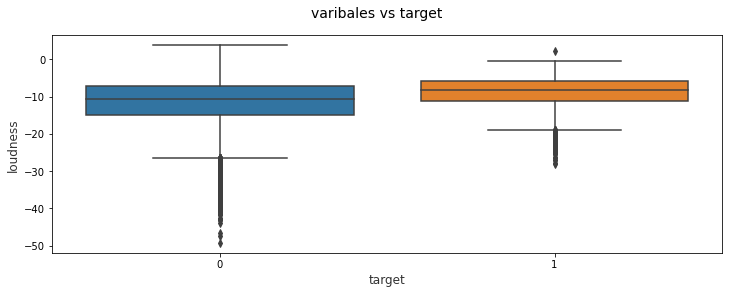

In [28]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('varibales vs target', fontsize=14)

sns.boxplot(x="target", y="loudness", data=df,  ax=ax)
ax.set_xlabel("target",size = 12,alpha=0.8)
ax.set_ylabel("loudness",size = 12,alpha=0.8)

#Vemos la distribución de la variables seleccionadas como relevantes: loudness

Text(0, 0.5, 'valence')

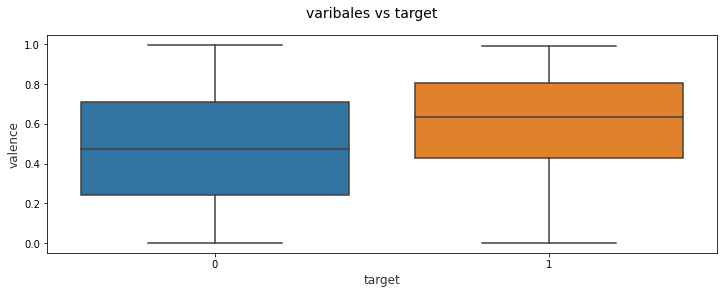

In [29]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('varibales vs target', fontsize=14)

sns.boxplot(x="target", y="valence", data=df,  ax=ax)
ax.set_xlabel("target",size = 12,alpha=0.8)
ax.set_ylabel("valence",size = 12,alpha=0.8)

Text(0, 0.5, 'acousticness')

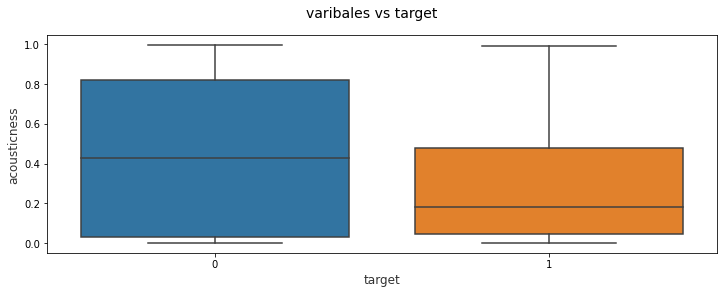

In [30]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('varibales vs target', fontsize=14)

sns.boxplot(x="target", y="acousticness", data=df,  ax=ax)
ax.set_xlabel("target",size = 12,alpha=0.8)
ax.set_ylabel("acousticness",size = 12,alpha=0.8)

#Vemos la distribución de la variables seleccionadas como relevantes: acousticness

Text(0.5, 0, 'decada')

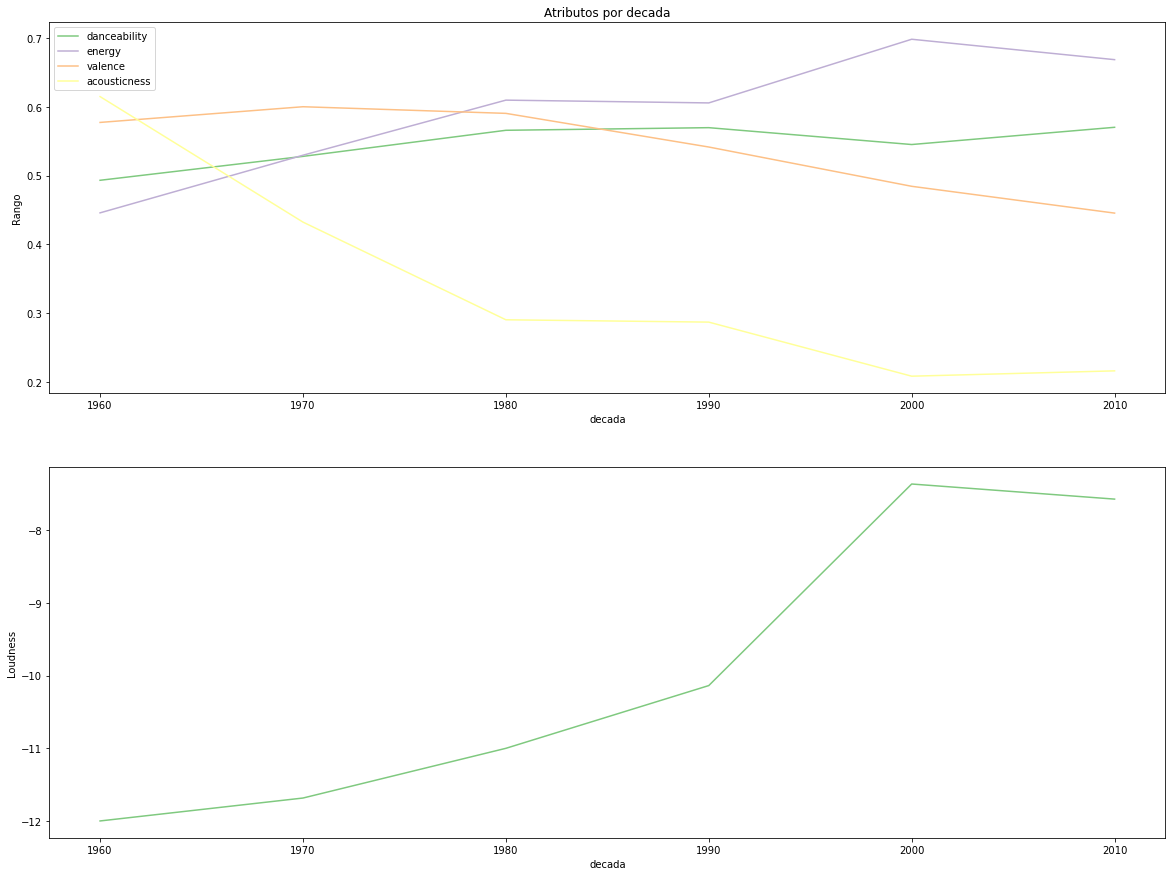

In [31]:
audio_attributes = ["danceability", "energy", "valence" , "acousticness"]
plt.figure(figsize = (20, 15))
sns.set_palette('Accent')
plt.subplot(2,1,1)
plt.ylabel('Rango')
for attribute in audio_attributes:
    x = df.groupby("decada")[attribute].mean()
    sns.lineplot(x=x.index,y=x,label=attribute)
    plt.title('Atributos por decada')
plt.subplot(2,1,2)
sns.lineplot(x = df.groupby('decada')['loudness'].mean().index, y = df.groupby('decada')['loudness'].mean())
plt.ylabel('Loudness')
plt.xlabel('decada')

#Observamos la distribucion de las variables que han mostrado correlatividad a lo largo de los años

<AxesSubplot:xlabel='decada', ylabel='instrumentalness'>

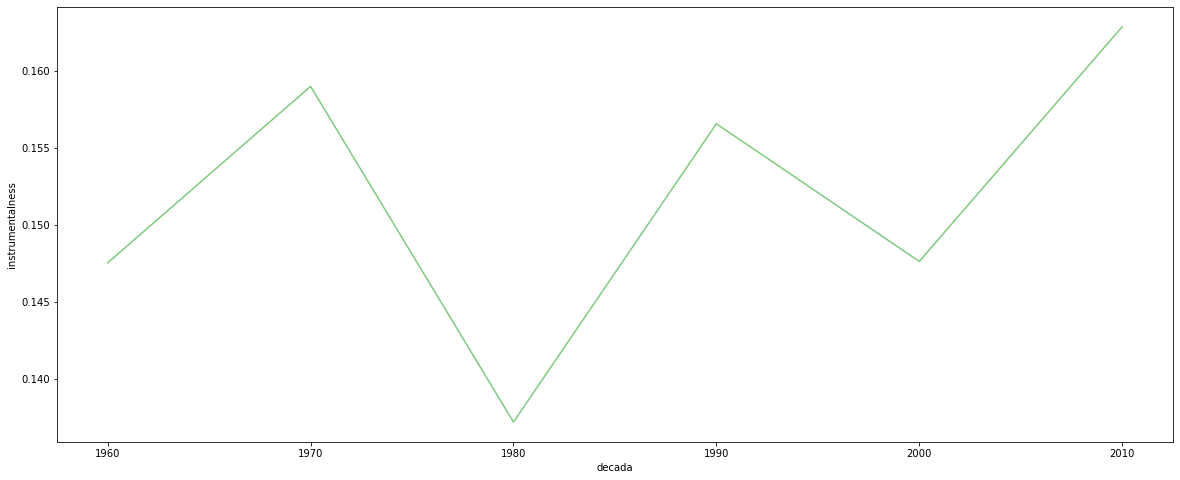

In [32]:

plt.figure(figsize = (20, 8))
sns.lineplot(x = df.groupby('decada')["instrumentalness"].mean().index, y = df.groupby('decada')["instrumentalness"].mean())

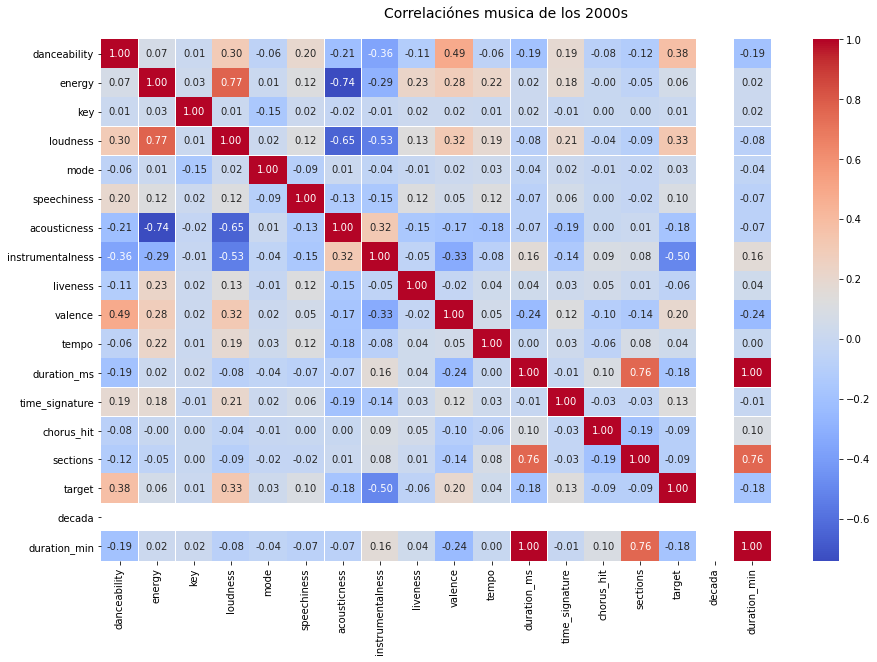

In [33]:
f, ax = plt.subplots(figsize=(15, 9))
ad = df.loc[df['decada'] == 2010]
corr = ad.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.001)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlaciónes musica de los 2000s', fontsize=14)

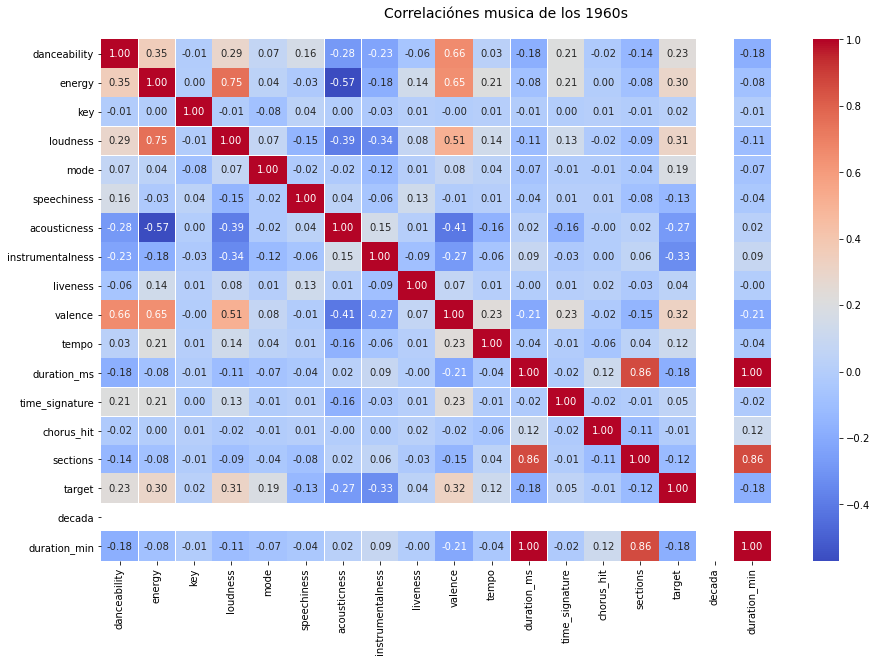

In [34]:
f, ax = plt.subplots(figsize=(15, 9))
ad = df.loc[df['decada'] == 1960]
corr = ad.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.001)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlaciónes musica de los 1960s', fontsize=14)

#observamos las correlaciones por decada, se puede ver que en los 60' las 
#correlaciones son muchisimo mas fuerte que en la musica más moderna

# Baseline que determina si una canción será Hit

Una cancion puede ser hit cuando se cumplen las siguietnes condiciones:

danceability > 0.6

loudness > -8

energy > 0.6

valence > 0.6

instrumentalness < 0.000006

acousticness < 0.2

# Preparación de los datos para los modelos

### Separación set de datos de entrenamiento y de stesteo

In [35]:
from sklearn.model_selection import train_test_split
y = df['target']
X = df.drop(columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
columnas = X.columns
columnas

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'decada', 'duration_min'],
      dtype='object')

In [37]:
columnas_interes = ['danceability', 'energy', 'loudness',
        'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections','decada']
# quitamos los features 'track', 'artist', 'uri', por ser texto y no ser categóricos orelevantes


In [38]:
X_train = X_train[columnas_interes]

In [39]:
X_test = X_test[columnas_interes]

# Análisis de componentes principales

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [41]:
# Standarizamos los valores
ss = StandardScaler()
X_train = ss.fit_transform(X_train)

In [42]:
# Realizamos un calculo de las componentes principales
pca = PCA()
pca.fit(X_train)

PCA()

In [43]:
# No se observan componentes muy importantes
pca.explained_variance_ratio_

array([0.21231247, 0.13690479, 0.09462834, 0.07805788, 0.07141724,
       0.06853734, 0.06378913, 0.06164091, 0.05835156, 0.04942815,
       0.03924484, 0.02719445, 0.02048299, 0.00959904, 0.00841088])

Text(0, 0.5, 'Varianza acumulada')

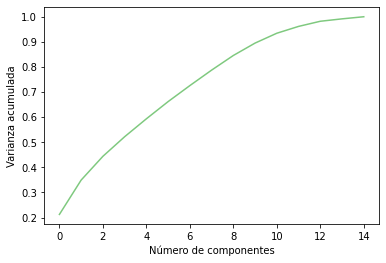

In [44]:
# No se observa una variación importante  con el cambio de variables

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')

In [45]:
pca.components_[:2]

array([[-0.28346476, -0.48156234, -0.46411159,  0.03036722, -0.11442806,
         0.44319044,  0.25456995, -0.05900159, -0.26639252, -0.14337962,
        -0.07384166, -0.18541936,  0.01175871, -0.04548943, -0.24507537],
       [-0.16667758,  0.01453729, -0.03927617, -0.13749465, -0.01360335,
        -0.11691046,  0.19770578, -0.02697614, -0.33091725,  0.03400045,
         0.60913898, -0.02021278,  0.03238488,  0.57232096,  0.29524615]])

# Modelos

In [46]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import confusion_matrix, recall_score, roc_curve, auc, accuracy_score, classification_report
from sklearn import tree
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore")

In [47]:
# Standarizamos los valores de X_test
ss = StandardScaler()
X_test = ss.fit_transform(X_test)

In [48]:
# Realizamos un calculo de las componentes principales para X_test
pca = PCA()
pca.fit(X_test)

PCA()

## Baseline

In [53]:
baseline = pd.DataFrame(X_test, columns=columnas_interes)
baseline['target'] = np.where(((baseline['danceability'] > 0.6) & (baseline['loudness'] > -10) & 
                               (baseline['energy'] > 0.6) & (baseline['valence'] > 0.6) & 
                               (baseline['acousticness'] < 0.2) & 
                               (baseline['instrumentalness'] < 0.002)), 1, 0)
baseline['target'].value_counts()
preds_baseline = baseline['target']

In [54]:
print(f"accuracy: {accuracy_score(y_test, preds_baseline)}")
print(f"recall: {recall_score(y_test, preds_baseline)}")
print(f"precision: {precision_score(y_test, preds_baseline)}")

accuracy: 0.520724115334207
recall: 0.0757918552036199
precision: 0.7803660565723793


<AxesSubplot:>

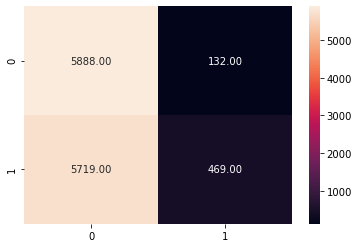

In [55]:
sns.heatmap(confusion_matrix(y_test, preds_baseline), annot=True, fmt=".2f")

## KNN

In [56]:
knn = KNeighborsClassifier(n_neighbors=20, weights = 'distance')

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20, weights='distance')

In [58]:
preds_knn = knn.predict(X_test)

In [59]:
preds_knn

array([1, 0, 0, ..., 1, 1, 1])

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
preds_knn_train = knn.predict(X_train)

In [62]:
def scores_knn(X,y,start,stop,step):
    
    # Voy a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors
    # Para esto voy a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame
    # Lista de Diccionarios
    
    scores_para_df = []
    
    # range(1,40,5) son los posibles valores de n_neighbors que quiero explorar. Son todos los enteros desde el 1
    # hasta el 40 en saltos de a 5. (Start,Stop,Step)
    
    for i in range(start,stop,step):
        # En cada iteración instanciamos el modelo con un hiperparámetro distinto
        
        model = KNeighborsClassifier(n_neighbors=i)

        # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV  
        
        cv_scores = cross_val_score(model, X, y, cv=5,scoring='accuracy')

        # Para cada valor de n_neighbours, creo un diccionario con el valor de n_neighbours y la media y el desvío de los scores.
        
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # Guardo cada uno en la lista de diccionarios
        
        scores_para_df.append(dict_row_score)
        
    df_scores = pd.DataFrame(scores_para_df)
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    return df_scores

In [63]:
#Se ejecuta la función que prueba diferentes valores del hiperparámetro k. 
#En este caso de 1 a 100 haciendo saltos de a 3 números. La función nos devolverá un 
#dataframe con una medida de exactitud de la predicción y sus cotas inferior y superior.
df_scores = scores_knn(X_train,y_train,1,100,10)

(1.0, 91.0)

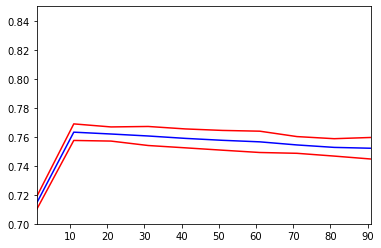

In [64]:
#Podemos visualizar los scores obtenidos para cada valor de k con un gráfico de lineas donde la 
#linea azul es el valor de exactitud medio y las líneas rojas las cotas inferior y superior.

plt.plot(df_scores['n_neighbours'],df_scores['limite_inferior'],color='r')
plt.plot(df_scores['n_neighbours'],df_scores['score_medio'],color='b')
plt.plot(df_scores['n_neighbours'],df_scores['limite_superior'],color='r')
plt.ylim(0.7, 0.85);
plt.xlim(1,91)

In [65]:
df_scores.sort_values("score_medio",ascending=False).head(10)

score_medio  score_std  n_neighbours  limite_inferior  limite_superior
1     0.763209   0.005709            11         0.757499         0.768918
2     0.761945   0.004879            21         0.757066         0.766824
3     0.760576   0.006565            31         0.754011         0.767141
4     0.758926   0.006519            41         0.752406         0.765445
5     0.757592   0.006819            51         0.750773         0.764411
6     0.756539   0.007351            61         0.749188         0.763889
7     0.754397   0.005767            71         0.748630         0.760164
8     0.752712   0.005997            81         0.746715         0.758709
9     0.752115   0.007450            91         0.744665         0.759565
0     0.714165   0.004414             1         0.709752         0.718579

In [66]:
# Elegimos el modelo óptimo que nos había indicado cross validation
model = KNeighborsClassifier(n_neighbors=16)
# Lo ajustamos sobre datos de entrenamiento
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=16)

In [67]:
X_test = preprocessing.scale(X_test, axis = 0)
preds_model_knn = model.predict(X_test)

### Ensamble de modelos


In [68]:
bdt = BaggingClassifier(DecisionTreeClassifier(max_depth=10))
bdt.fit(X_train, y_train)
preds_bdt = bdt.predict(X_test)

# Modelo de Regresión Logistica

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr = LogisticRegression(C=1e10)
lr.fit(X_train,y_train)


LogisticRegression(C=10000000000.0)

In [71]:
lrclf = LogisticRegression(random_state=0)
lrclf.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Ensamble de modelos de regresion logistica

In [72]:
bdt_lr = BaggingClassifier(LogisticRegression())

In [73]:
bdt_lr.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression())

## DECISION TREE

### Ensamble de modelos

In [74]:
# parameters = {'max_depth':range(3,6)}
parameters = {'max_depth':range(1,20),
             'min_samples_split':range(1,20),
             'min_samples_leaf':range(1,10)}
clf3 = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), parameters, n_jobs=4)
clf3.fit(X=X_train, y=y_train)
tree_modelp = clf3.best_estimator_
print (clf3.best_score_, clf3.best_params_)


0.762962962962963 {'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 18}


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.860117 to fit



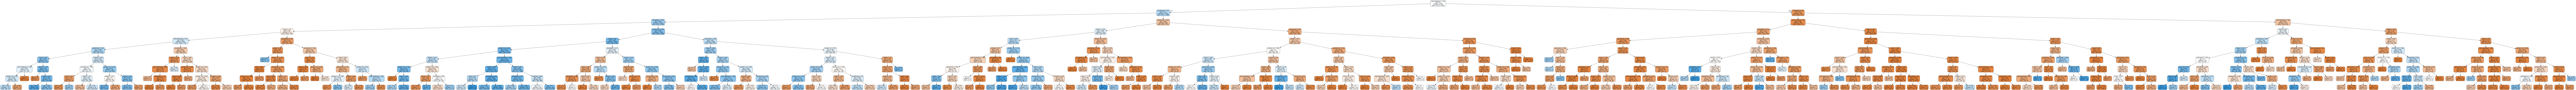

In [75]:
from pydotplus import graph_from_dot_data
from sklearn.tree import DecisionTreeClassifier, export_graphviz

Xa = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'decade']

dot_data = export_graphviz(tree_modelp, out_file=None,  
                feature_names=Xa,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

In [76]:
print (clf3.best_score_, clf3.best_params_)

0.762962962962963 {'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 18}


### El mejor modelo resultó el árbol de decisión obtenido con el ensable Bagging

bdt

In [77]:
preds = {}
preds.update({'lrdlf': lrclf.predict(X_test)})
preds.update({'lr': lr.predict(X_test)})
preds.update({'model_knn': model.predict(X_test)})
preds.update({'bdt': bdt.predict(X_test)})
preds.update({'bdt_lr': bdt_lr.predict(X_test)})
preds.update({'tree': tree_modelp.predict(X_test)})

accuracy lrdlf: 0.7406
recall lrdlf: 0.8197
precision lrdlf: 0.7121


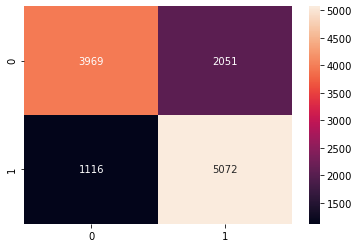

accuracy lr: 0.7405
recall lr: 0.8197
precision lr: 0.712


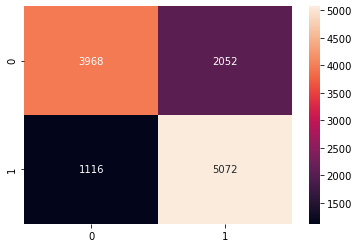

accuracy model_knn: 0.7664
recall model_knn: 0.8715
precision model_knn: 0.7239


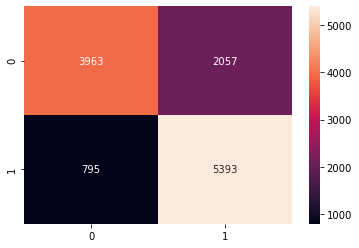

accuracy bdt: 0.7832
recall bdt: 0.863
precision bdt: 0.748


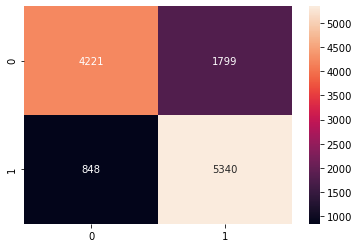

accuracy bdt_lr: 0.7409
recall bdt_lr: 0.8205
precision bdt_lr: 0.7122


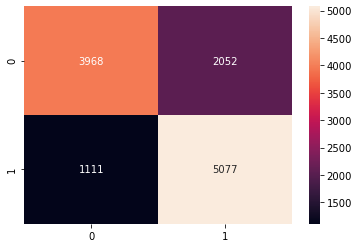

accuracy tree: 0.7584
recall tree: 0.8507
precision tree: 0.7221


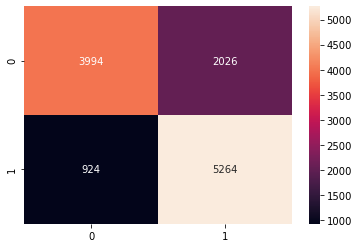

In [78]:
for pred in preds:
    print(f"accuracy {pred}: {accuracy_score(y_test, preds[pred]).round(4)}")
    print(f"recall {pred}: {recall_score(y_test, preds[pred]).round(4)}")
    print(f"precision {pred}: {precision_score(y_test, preds[pred]).round(4)}")
    confusion = confusion_matrix(y_test, preds[pred])
    sns.heatmap(confusion,annot=True,fmt='g')
    plt.show()
    


In [79]:
preds_prob = {}
preds_prob.update({'lrdlf': lrclf.predict_proba(X_test)})
preds_prob.update({'tree': tree_modelp.predict_proba(X_test)})
preds_prob.update({'lr': lr.predict_proba(X_test)})
preds_prob.update({'model_knn': model.predict_proba(X_test)})
preds_prob.update({'bdt_lr': bdt_lr.predict_proba(X_test)})
preds_prob.update({'bdt': bdt.predict_proba(X_test)})


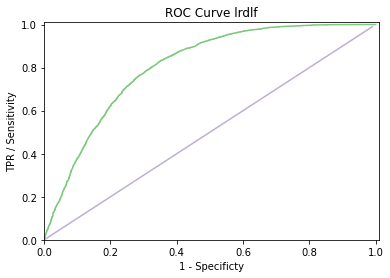

AUC= 0.8057580903559992


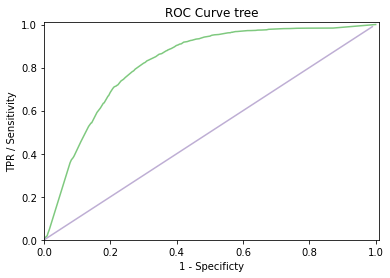

AUC= 0.8218920663077395


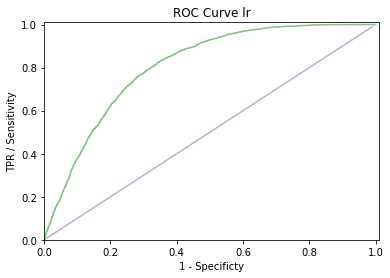

AUC= 0.8057600499949533


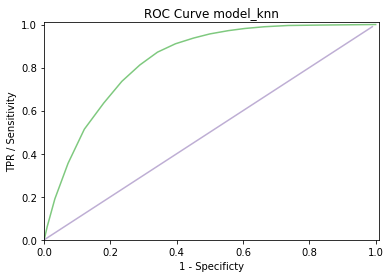

AUC= 0.833709669019665


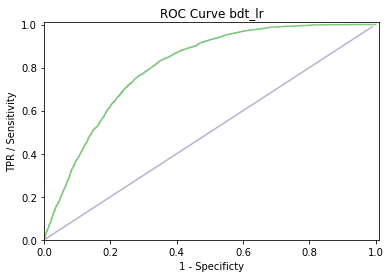

AUC= 0.8057507886875681


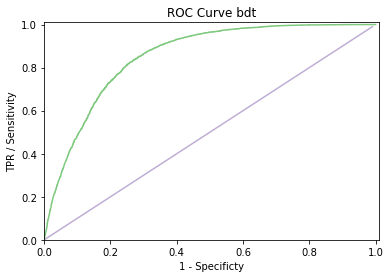

AUC= 0.8518939373602751


In [80]:
for item in preds_prob:
    preds_left = []
    preds_left = preds_prob[item][:,1]
    fpr,tpr,_ = roc_curve(y_test, preds_prob[item][:,1])
    df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
    plt.axis([0, 1.01, 0, 1.01])
    plt.xlabel('1 - Specificty')
    plt.ylabel('TPR / Sensitivity')
    plt.title(f'ROC Curve {item}')
    plt.plot(df['fpr'],df['tpr'])
    plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
    plt.show() 
    print('AUC=', auc(fpr, tpr))


# Modelo elegido
### Clasificador Bagging basado en Árbol de clasificación

In [81]:
preds_prob = bdt.predict_proba(X_test)
preds_left = preds_prob[:,1]

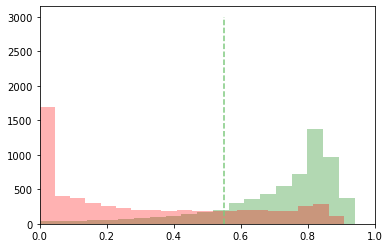

In [82]:
negativos = [pred for pred, y_true in zip(preds_left, y_test) if y_true==0]
positivos = [pred for pred, y_true in zip(preds_left, y_test) if y_true==1]
umbral=0.55
plt.hist(positivos, color='green', alpha=0.3, bins=20)
plt.hist(negativos, color='red', alpha=0.3, bins=20)
plt.vlines(umbral, 0, 3000, linestyles='dashed')
plt.xlim((0,1))
plt.show()

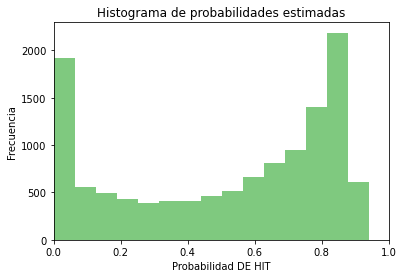

In [83]:
# 15 bins
preds_left = preds_prob[:,1]
plt.hist(preds_left, bins=15)

# x-axis de 0 a 1
plt.xlim(0,1)
plt.title('Histograma de probabilidades estimadas')
plt.xlabel('Probabilidad DE HIT')
plt.ylabel('Frecuencia')
plt.show()

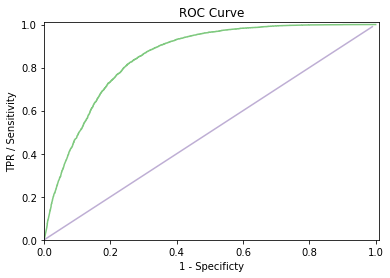

In [84]:
fpr,tpr,_ = roc_curve(y_test, preds_prob[:,1])
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

In [85]:
print('AUC=', auc(fpr, tpr))

AUC= 0.8518939373602751


# Comparacion de méticas del Baseline con Modelo predictivo

In [86]:
#accuracy ¿qué el porcentaje de casos que el modelo ha acertado?, nuestro dataset está balanceado
#recall ¿qué porcentaje de las canciones que serán hit somos capaces de identificar?
#precision ¿qué porcentaje de las canciones que definimos como hit lo serán realmente?

### Baseline

In [87]:
print(f"accuracy: {accuracy_score(y_test, preds_baseline).round(4)}")
print(f"recall: {recall_score(y_test, preds_baseline).round(4)}")
print(f"precision: {precision_score(y_test, preds_baseline).round(4)}")

accuracy: 0.5207
recall: 0.0758
precision: 0.7804


<AxesSubplot:>

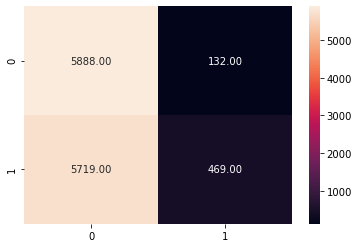

In [88]:
sns.heatmap(confusion_matrix(y_test, preds_baseline), annot=True, fmt=".2f")

### Modelo predictivo

In [89]:
preds_bdt = bdt.predict(X_test)

In [90]:
print(f"accuracy: {accuracy_score(y_test, preds_bdt).round(4)}")
print(f"recall: {recall_score(y_test, preds_bdt).round(4)}")
print(f"precision: {precision_score(y_test, preds_bdt).round(4)}")

accuracy: 0.7832
recall: 0.863
precision: 0.748


<AxesSubplot:>

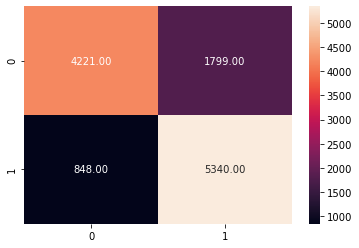

In [91]:
sns.heatmap(confusion_matrix(y_test, preds_bdt), annot=True, fmt=".2f")

**Conclusión**

Podemos observar que el porcentaje de aciertos del Baseline es de 52% contra un 78% del modelo predictivo (la mética es válida porque nuestro dataset está balanceado).
Si vemos la métrica recall, porcentaje de canciones que serán hit que podemos detectar, el baseline detecta sólo el 7,5% contra el 86% del modelo predictivo
En cuanto a la precisión vemos que el baseline tiene 78% sobre 74% del modelo predictivo, pero es muy poco lo que detecta como indica el recall de cada modelo, es decir perderíamos más un 90% de los posibles hits si nos quedamos con el baseline

